# IMPORTING ALL THE LIBRARIES.

In [4]:
import pandas as pd # TO READ THE EXCEL FILE
import numpy as np # TO ACCESS THE DATA IN FORM OF NUMPY ARRAY
import matplotlib.pyplot as plt # FOR VISUALIZATION
import seaborn as sns  # FOR VISUALIZATION

# LOADING THE DATASET.

In [5]:
data=pd.read_excel(r'C:\Users\pc\OneDrive\Desktop\REDWINE DATASET.xlsx')

# CREATING A CLASS FOR NEURAL NETWORK ARCHITECTURE.

In [6]:
class NeuralNetwork:
    # CONSTRUCTOR FOR ASSIGNING THE COMMAN ATTRIBUTES TO ALL THE INSTANCES OF THE CLASS.
    def __init__(self, input_size, hidden_size, output_size):
        # DETERMINING THE INPUT SIZE,HIDDEN LAYER SIZE AND NEURONS IN THE OUTPUT LAYER.
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        # ASSIGNING THE RANDOM VALUES FOR WEIGHTS OF THE LAYER ON THE BASIS OF GAUSSIAN CURVE. 
        
        ## ALSO NOTE THAT INITIALIZATIOIN OF BAIS TERM IS NOT SET TO BE ZEOR AS SOME TIME THIS CAN MASK THE GRADIENT EXPLODING DURING THE BACK FLOW OF GRADIENT DURING THE BACK PROPAGARTION.
        self.weights_hidden1 = np.random.randn(self.hidden_size[0], self.input_size)
        self.bias_hidden1 = np.zeros((self.hidden_size[0], 1))-0.3
        
        self.weights_hidden2 = np.random.randn(self.hidden_size[1], self.hidden_size[0])
        self.bias_hidden2 = np.zeros((self.hidden_size[1], 1))-0.3
        
        self.weights_hidden3 = np.random.randn(self.hidden_size[2], self.hidden_size[1])
        self.bias_hidden3 = np.zeros((self.hidden_size[2], 1))-0.3
        
        self.weights_output = np.random.randn(self.output_size, self.hidden_size[2])
        self.bias_output = np.zeros((self.output_size, 1))-0.3
        
        # CUSTOM FUNCTIONS FOR ACTIVATION FUNCTION WHICH REMOVE THE NON LINEARITY OF THE DATASET. 
    def relu(self, x):
        return np.maximum(0, x)
    
    def softmax(self, x):
        x -= np.max(x, axis=0)
        exp_vals = np.exp(x)
        return exp_vals / np.sum(exp_vals, axis=0)
    # FUNCTION FOR FORWARD PROPAGATION.
    
    def forward_propagation(self, x):
        self.input = x
        # MULTIPLICATION OF WEIGHTS WITH INPUT DATA AND ADDING THE BAIS TERM WHICH HELPS US TO SHIFT THE ACTIVATION FUCNTIONS ALONG THE X-AXIS. 
        self.hidden1_input = np.dot(self.weights_hidden1, self.input) + self.bias_hidden1
        self.hidden1_output = np.tanh(self.hidden1_input)
        
        self.hidden2_input = np.dot(self.weights_hidden2, self.hidden1_output) + self.bias_hidden2
        self.hidden2_output = np.tanh(self.hidden2_input)
        
        
        self.hidden3_input = np.dot(self.weights_hidden3, self.hidden2_output) + self.bias_hidden3
        self.hidden3_output = np.tanh(self.hidden3_input)
        
        self.output_input = np.dot(self.weights_output, self.hidden3_output) + self.bias_output
        
        self.output_output = self.softmax(self.output_input)
        
    #DEFINING THE LOSS FUNCTION     
    
    def mse_loss(self, predicted, target):
        return np.mean((predicted - target)**2)
     
        # CREATING THE FUNCTION FOR BACKPROPAGATION.
        
    def backpropagation(self, x, y, learning_rate):
    
        # COMPUTING THE DERIVATIVE OF LOSS WITH RESPECT TO INPUT FROM SOFTMAX.
        d_loss_predicted = 2 * (self.output_output - y)/1579
        
        # COMPUTING THE DERIVATIVE OF LOSS WITH RESPECT TO WEIGHTS OF OUTPUT LAYER= dl/dWo=(dl/dsoftmaxoutput)*(dsoftmaxinput/dWo) 
        dw_output = np.dot(d_loss_predicted, self.hidden3_output.T)
        db_output = np.sum(d_loss_predicted, axis=1, keepdims=True)
        
        # COMPUTING THE DERIVATIVE OF LOSS WITH RESPECT TO WEIGHTS OF HIDDEN LAYER 3= dl/dW3=(dl/dsoftmaxoutput)*(dsoftmaxinput/dhiddenlayer3output)*(dhiddenlayer3output/dW3)
        d_loss_hidden3 = np.dot(self.weights_output.T, d_loss_predicted)
        d_loss_hidden3=d_loss_hidden3*(1-(np.tanh(self.hidden3_input))**2) 
        
        dw_hidden3 = np.dot(d_loss_hidden3, self.hidden2_output.T)
        db_hidden3 = np.sum(d_loss_hidden3, axis=1, keepdims=True)
       
        # COMPUTING THE DERIVATIVE OF LOSS WITH RESPECT TO WEIGHTS OF HIDDEN LAYER 2= dl/dW2=(dl/dsoftmaxoutput)*(dsoftmaxinput/dhiddenlayer3output)*(dhiddenlayer3output/dhiddenlayer2output)*(dhiddenlayer2output/dW2)
        d_loss_hidden2 = np.dot(self.weights_hidden3.T, d_loss_hidden3)
        d_loss_hidden2=d_loss_hidden2*(1-(np.tanh(self.hidden2_input)))
        
        dw_hidden2 = np.dot(d_loss_hidden2, self.hidden1_output.T)
        db_hidden2 = np.sum(d_loss_hidden2, axis=1, keepdims=True)
        # COMPUTING THE DERIVATIVE OF LOSS WITH RESPECT TO WEIGHTS OF HIDDEN LAYER 1= dl/dW1=(dl/dsoftmaxoutput)*(dsoftmaxinput/dhiddenlayer3output)*(dhiddenlayer3output/dhiddenlayer2output)*(dhiddenlayer2output/dhiddenlayer1output)*(dhiddenlayer1output/dW1)
        d_loss_hidden1 = np.dot(self.weights_hidden2.T, d_loss_hidden2)
        d_loss_hidden1=d_loss_hidden1*(1-np.tanh(self.hidden1_input)**2)

        
        dw_hidden1 = np.dot(d_loss_hidden1, x.T)
        db_hidden1 = np.sum(d_loss_hidden1, axis=1, keepdims=True)
        
        # UPDATING THE WEIGHTS AND BAIS OF EACH LAYER.
        self.weights_output -= learning_rate * dw_output
        self.bias_output -= learning_rate * db_output
        
        self.weights_hidden3 -= learning_rate * dw_hidden3
        self.bias_hidden3 -= learning_rate * db_hidden3
        
        self.weights_hidden2 -= learning_rate * dw_hidden2
        self.bias_hidden2 -= learning_rate * db_hidden2
        
        self.weights_hidden1 -= learning_rate * dw_hidden1
        self.bias_hidden1 -= learning_rate * db_hidden1

    
     # FUCNTION WHICH RECIEVE X_test values and pass through Neural Netwrok and return the output of softmax.       
    def predict(self, x):
        self.forward_propagation(x)
        return self.output_output
    # FUNCTION TO FIND THE ACCURACY OF THE MODEL WITH THE HELP OF y_pred calulated from predict() function.
    def calculate_accuracy(self,predictions, targets):
        predicted_labels = np.argmax(predictions, axis=1)
        true_labels = np.argmax(targets, axis=1)
        
    
        correct_predictions = np.sum(np.equal(predicted_labels,true_labels))
        total_predictions = len(targets)
    
        accuracy = correct_predictions / 1579
        return accuracy
    # FUCNCTION TO TRAIN THE MODEL ON TRAINING DATASET TO OPTIMAL WEIGHTS AND BIAS.
    def train(self, x, y, epochs, learning_rate):
        for epoch in range(epochs):
            
            self.forward_propagation(x)
            self.backpropagation(x, y, learning_rate)
            loss = self.mse_loss(self.output_output, y)
            
            
            accuracy=self.calculate_accuracy(self.output_output.T,one_hot_encoded_vector)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f},ACCURACY :{accuracy*100} ")
    # FUNCTION TO TEST THE MODEL ON TEST DATASET.
    def test(self,x):
        self.forward_propagation(x)
        
        predictions=np.argmax(self.output_output,axis=0)
    
        return(predictions)


input_size = 11
hidden_size = [15,15,15]
output_size = 6


# PREPARING THE DATASET FOR INPUT AND SPLITTING INTO 80:20 RATION.

In [7]:
X=data.drop('quality',axis=1)
Y=data['quality']
split_value=int(len(X)*0.8)
X_train=X[:split_value]
Y_train=Y[:split_value]
X_test=X[split_value:]
Y_test=Y[split_value:]
label_map={3:0,4:1,5:2,6:3,7:4,8:5}
# REMAPPING THE CLASS LABELS AS THERE ARE ONLY [3,4,5,6,7,8] CLASSES. THIS WE HAVE DONE ONLY FOR PROPER VISUALISATION AND AVOID AND CONFUSION WHILE VIEWING THE y_pred VALUES.
Y_train=Y_train.map(label_map)
Y_test=Y_test.map(label_map)
Y_train.shape


(1279,)

# IMPORTING STATISTICS MODULE TO NORMALZE THE DATASET ON MEAN AND STANDARD DEVIATION PARAMETER.

In [8]:
import statistics as stats
columns=data.drop('quality',axis=1).columns.tolist()
for i in columns:
    X_train[str(i)]=(X_train[str(i)]-stats.mean(X_train[str(i)]))/(stats.stdev(X_train[str(i)]))
for i in columns:
    X_test[str(i)]=(X_test[str(i)]-stats.mean(X_test[str(i)]))/(stats.stdev(X_test[str(i)]))   
final_output=[[1,0,0,0,0,0],[0,1,0,0,0,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1,]]
# CREATING AN EMPTY LIST FOR ONE HOT ENCODING THE y_train values.
one_hot_encoded_vector=[]
for i in Y_train:
    index=int(i)
    one_hot_encoded_vector.append(final_output[index])
one_hot_encoded_vector=np.array(one_hot_encoded_vector)


C:\Users\pc\AppData\Local\Temp\ipykernel_19112\3445174593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[str(i)]=(X_train[str(i)]-stats.mean(X_train[str(i)]))/(stats.stdev(X_train[str(i)]))
C:\Users\pc\AppData\Local\Temp\ipykernel_19112\3445174593.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[str(i)]=(X_test[str(i)]-stats.mean(X_test[str(i)]))/(stats.stdev(X_test[str(i)]))


# CREATING THE INSTANCE OF THE NEURAL NETWORK CLASS AND CALLING ITS ATTRIBUTE (train).

In [9]:
nn = NeuralNetwork(input_size, hidden_size, output_size)

nn.train(X_train.T, one_hot_encoded_vector.T, epochs=500, learning_rate=0.96)

Epoch 1/500, Loss: 0.2161,ACCURACY :13.426219126029132 
Epoch 2/500, Loss: 0.1468,ACCURACY :32.045598480050664 
Epoch 3/500, Loss: 0.1351,ACCURACY :35.33882203926535 
Epoch 4/500, Loss: 0.1324,ACCURACY :31.412286257124762 
Epoch 5/500, Loss: 0.1236,ACCURACY :40.59531348955035 
Epoch 6/500, Loss: 0.1324,ACCURACY :33.50221659278024 
Epoch 7/500, Loss: 0.1186,ACCURACY :43.191893603546546 
Epoch 8/500, Loss: 0.1088,ACCURACY :40.215326155794806 
Epoch 9/500, Loss: 0.1012,ACCURACY :46.04179860671311 
Epoch 10/500, Loss: 0.1029,ACCURACY :41.41861937935402 
Epoch 11/500, Loss: 0.0988,ACCURACY :47.24509183027232 
Epoch 12/500, Loss: 0.1031,ACCURACY :41.10196326789107 
Epoch 13/500, Loss: 0.0970,ACCURACY :47.49841671944269 
Epoch 14/500, Loss: 0.0989,ACCURACY :41.41861937935402 
Epoch 15/500, Loss: 0.0942,ACCURACY :48.89170360987967 
Epoch 16/500, Loss: 0.0957,ACCURACY :43.57188093730209 
Epoch 17/500, Loss: 0.0929,ACCURACY :48.575047498416716 
Epoch 18/500, Loss: 0.0952,ACCURACY :44.20519316022

Epoch 155/500, Loss: 0.0826,ACCURACY :50.094996833438884 
Epoch 156/500, Loss: 0.0820,ACCURACY :50.79164027865738 
Epoch 157/500, Loss: 0.0840,ACCURACY :49.968334388853705 
Epoch 158/500, Loss: 0.0825,ACCURACY :51.04496516782774 
Epoch 159/500, Loss: 0.0829,ACCURACY :50.47498416719443 
Epoch 160/500, Loss: 0.0819,ACCURACY :51.93160227992401 
Epoch 161/500, Loss: 0.0829,ACCURACY :50.22165927802406 
Epoch 162/500, Loss: 0.0818,ACCURACY :51.42495250158328 
Epoch 163/500, Loss: 0.0836,ACCURACY :50.031665611146295 
Epoch 164/500, Loss: 0.0809,ACCURACY :51.361621279290695 
Epoch 165/500, Loss: 0.0818,ACCURACY :50.53831538948702 
Epoch 166/500, Loss: 0.0805,ACCURACY :51.99493350221659 
Epoch 167/500, Loss: 0.0830,ACCURACY :49.335022165927796 
Epoch 168/500, Loss: 0.0798,ACCURACY :52.12159594680177 
Epoch 169/500, Loss: 0.0807,ACCURACY :51.234958834705516 
Epoch 170/500, Loss: 0.0792,ACCURACY :52.311589613679544 
Epoch 171/500, Loss: 0.0797,ACCURACY :51.99493350221659 
Epoch 172/500, Loss: 0.0

Epoch 300/500, Loss: 0.0819,ACCURACY :51.17162761241292 
Epoch 301/500, Loss: 0.0830,ACCURACY :50.158328055731474 
Epoch 302/500, Loss: 0.0828,ACCURACY :49.77834072197594 
Epoch 303/500, Loss: 0.0823,ACCURACY :51.10829639012033 
Epoch 304/500, Loss: 0.0809,ACCURACY :50.47498416719443 
Epoch 305/500, Loss: 0.0823,ACCURACY :51.10829639012033 
Epoch 306/500, Loss: 0.0827,ACCURACY :50.031665611146295 
Epoch 307/500, Loss: 0.0829,ACCURACY :50.98163394553515 
Epoch 308/500, Loss: 0.0828,ACCURACY :49.58834705509816 
Epoch 309/500, Loss: 0.0816,ACCURACY :51.74160861304623 
Epoch 310/500, Loss: 0.0817,ACCURACY :50.60164661177961 
Epoch 311/500, Loss: 0.0805,ACCURACY :51.10829639012033 
Epoch 312/500, Loss: 0.0815,ACCURACY :50.98163394553515 
Epoch 313/500, Loss: 0.0813,ACCURACY :51.361621279290695 
Epoch 314/500, Loss: 0.0812,ACCURACY :51.2982900569981 
Epoch 315/500, Loss: 0.0798,ACCURACY :51.80493983533883 
Epoch 316/500, Loss: 0.0803,ACCURACY :50.854971500949965 
Epoch 317/500, Loss: 0.0811,

Epoch 445/500, Loss: 0.0787,ACCURACY :53.57821405953135 
Epoch 446/500, Loss: 0.0809,ACCURACY :52.50158328055732 
Epoch 447/500, Loss: 0.0792,ACCURACY :52.75490816972768 
Epoch 448/500, Loss: 0.0791,ACCURACY :53.70487650411653 
Epoch 449/500, Loss: 0.0794,ACCURACY :53.19822672577581 
Epoch 450/500, Loss: 0.0799,ACCURACY :52.12159594680177 
Epoch 451/500, Loss: 0.0806,ACCURACY :52.12159594680177 
Epoch 452/500, Loss: 0.0787,ACCURACY :53.45155161494617 
Epoch 453/500, Loss: 0.0780,ACCURACY :53.45155161494617 
Epoch 454/500, Loss: 0.0790,ACCURACY :52.75490816972768 
Epoch 455/500, Loss: 0.0789,ACCURACY :53.008233058898035 
Epoch 456/500, Loss: 0.0798,ACCURACY :52.184927169094365 
Epoch 457/500, Loss: 0.0797,ACCURACY :53.19822672577581 
Epoch 458/500, Loss: 0.0814,ACCURACY :51.17162761241292 
Epoch 459/500, Loss: 0.0814,ACCURACY :50.91830272324256 
Epoch 460/500, Loss: 0.0798,ACCURACY :52.94490183660545 
Epoch 461/500, Loss: 0.0827,ACCURACY :51.10829639012033 
Epoch 462/500, Loss: 0.0800,A

# PROCESSING THE TEST DATA

In [10]:
one_hot_encoded_vector_test=[]
for i in Y_test:
    
    index=int(i)
    one_hot_encoded_vector_test.append(final_output[index])
one_hot_encoded_vector_test=np.array(one_hot_encoded_vector)

In [11]:
Y_pred=nn.test(X_test.T)

# VISUALIZING THE PREDICTIONS OF THE MODEL ON THE BASIS OF DIFFERENT EVALUATION METRICS

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y_pred,Y_test)
confusion_matrix

array([[  0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0],
       [  5,   9, 106,  55,   3,   0],
       [  0,   0,  33,  53,  14,   3],
       [  0,   1,   4,  28,   5,   0],
       [  0,   0,   0,   0,   0,   0]], dtype=int64)

In [13]:
PRECISION={}
RECALL={}
ACCURACY={}
F1_SCORE={}
for i in range(confusion_matrix.shape[0]):
    TP=confusion_matrix[i,i]
    FP=confusion_matrix[i,:].sum()-TP
    FN=confusion_matrix[:,i].sum()-TP
    TN=confusion_matrix.sum().sum()-TP-FP-FN
    if TP==0 and FP==0:
        ACCURACY[i]=(TP+TN)/confusion_matrix.sum().sum()
        PRECISION[i]=0
        RECALL[i]=TP/(TP+FN)
        F1_SCORE[i]=0
    else:
        ACCURACY[i]=(TP+TN)/confusion_matrix.sum().sum()
        PRECISION[i]=TP/(TP+FP)
        RECALL[i]=TP/(TP+FN)
        F1_SCORE[i]=(2*PRECISION[i]*RECALL[i])/(PRECISION[i]+RECALL[i])


In [146]:
A=ACCURACY.values()
R=RECALL.values()
P=PRECISION.values()
F1=F1_SCORE.values()


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

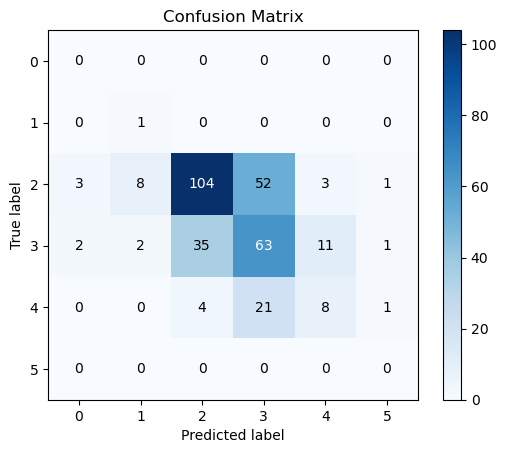

In [152]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_pred,Y_test)

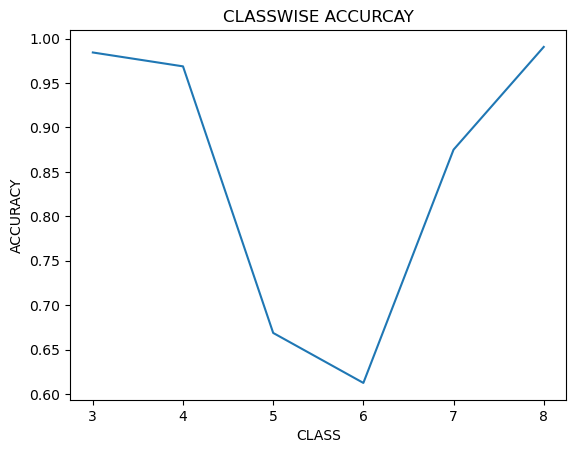

In [147]:
f,ax=plt.subplots(1)
ax.plot([3,4,5,6,7,8],np.array(list(A)))
plt.title('CLASSWISE ACCURCAY')
plt.xlabel('CLASS')
plt.ylabel('ACCURACY')
plt.show()

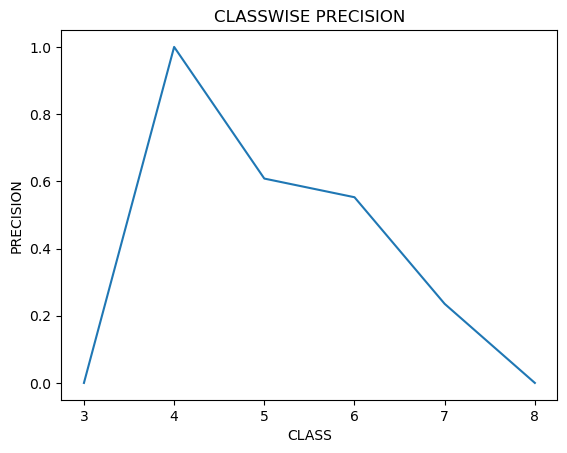

In [148]:
f,ax=plt.subplots(1)
ax.plot([3,4,5,6,7,8],np.array(list(P)))
plt.title('CLASSWISE PRECISION')
plt.xlabel('CLASS')
plt.ylabel('PRECISION')
plt.show()

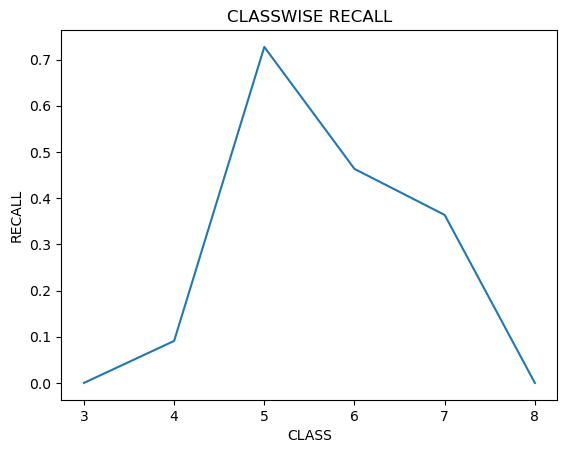

In [149]:
f,ax=plt.subplots(1)
ax.plot([3,4,5,6,7,8],np.array(list(R)))
plt.title('CLASSWISE RECALL')
plt.xlabel('CLASS')
plt.ylabel('RECALL')
plt.show()

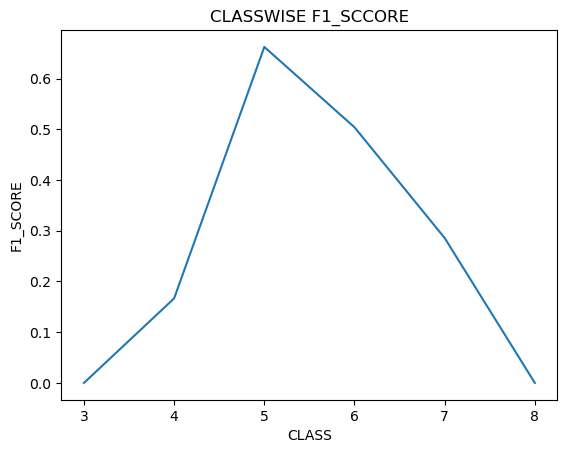

In [150]:
f,ax=plt.subplots(1)
ax.plot([3,4,5,6,7,8],np.array(list(F1)))
plt.title('CLASSWISE F1_SCCORE')
plt.xlabel('CLASS')
plt.ylabel('F1_SCORE')
plt.show()